In [32]:

import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid

In [33]:
torch.manual_seed(0)
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [34]:
def train(model, dataset, n_iter=100):
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.NLLLoss()
    model.train()
    
    for epoch in range(n_iter):
        for images, targets in dataset:
            optimizer.zero_grad()
            images = images.view(images.size(0), -1)
            out = model(images.to(device))
            loss = criterion(out, targets.to(device))
            loss.backward()
            optimizer.step()
        
        if epoch % 10 == 0:
            print('epoch: %3d loss: %.4f'%(epoch, loss))

def accuracy(model, trainset):
    model.eval()
    correct = 0
    for images, targets in trainset:
        images = images.view(images.size(0), -1)
        correct += (model(images.to(device)).argmax(dim=1)==targets.to(device)).sum()
    return correct / len(trainset)

In [39]:
data_dir = './trainset'
dataset = datasets.ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((100,100)),transforms.ToTensor()
]))

batch_size = 128
val_size = 1000
train_size = len(dataset) - val_size 

train_data,val_data = random_split(dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)

Length of Train Data : 8000
Length of Validation Data : 1000


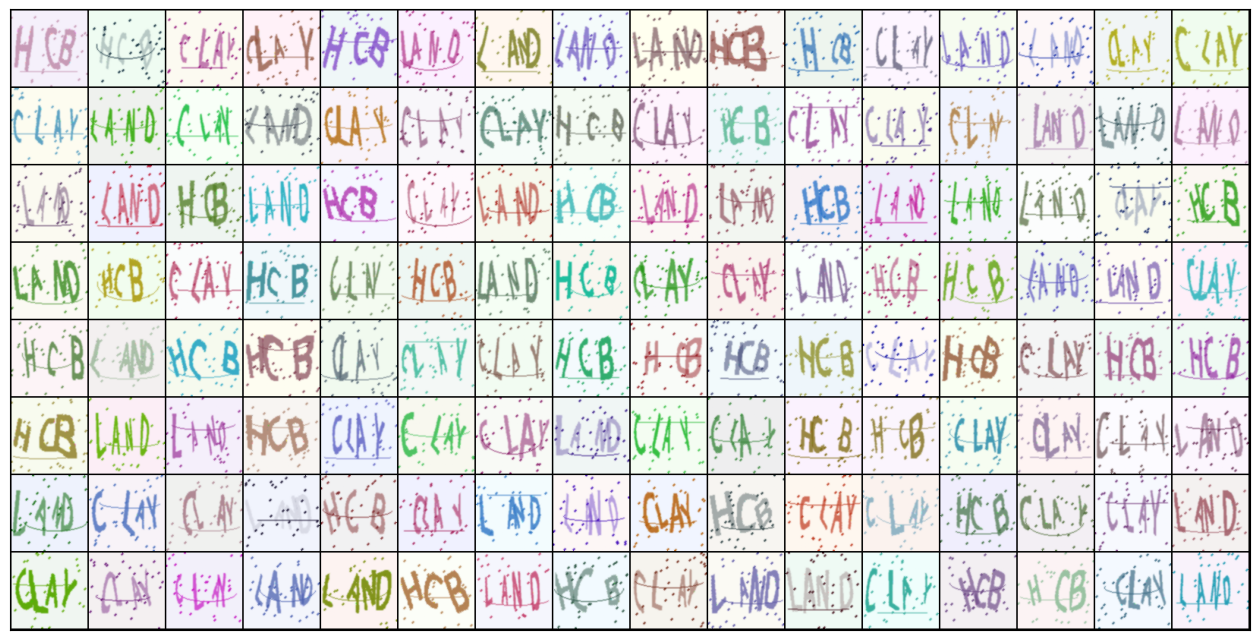

In [36]:
def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

In [40]:
hidden_size=300

model = nn.Sequential(
    nn.Linear(100 * 100 * 3, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 10), 
    nn.LogSoftmax(dim=-1)
).to(device)
train(model, train_dl)


epoch:   0 loss: 1.1033
epoch:  10 loss: 0.9485
epoch:  20 loss: 0.9056
epoch:  30 loss: 0.6255
epoch:  40 loss: 1.2225
epoch:  50 loss: 0.4080
epoch:  60 loss: 0.2767
epoch:  70 loss: 0.3349
epoch:  80 loss: 0.3878
epoch:  90 loss: 0.4497


In [41]:
torch.save(model, "neural_network_model.pth")

In [45]:
another_model = torch.load("neural_network_model.pth")
another_model.eval()
print(accuracy(another_model, val_dl))

tensor(186.)
